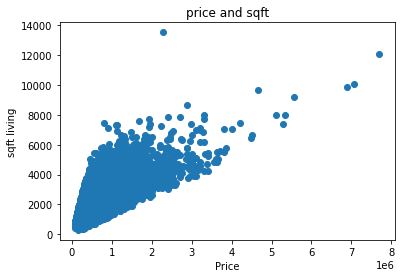

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#df import
df1 = pd.read_csv("./data/kc_house_data.csv")
#df1 = pd.read_csv("/Users/arina/Documents/smpls/kc_house_data.csv")

#Price-area graph
x = df1['price']
y = df1['sqft_living']

plt.scatter(x, y)
plt.title('price and sqft')
plt.xlabel('Price')
plt.ylabel('sqft living')
plt.show()


In [5]:
#Search for the maximum, minimum and average price
sortedbyprice = df1.sort_values(by='price', ascending=True)
print(sortedbyprice)
p = df1['price']
avg_value = sum(p) / len(p)
print('avarage price = ', (avg_value))
print('max = ', (avg_value))
print('min = ', (avg_value))

               id             date      price  bedrooms  bathrooms  \
1149   3421079032  20150217T000000    75000.0         1       0.00   
15293    40000362  20140506T000000    78000.0         2       1.00   
465    8658300340  20140523T000000    80000.0         1       0.75   
16198  3028200080  20150324T000000    81000.0         2       1.00   
8274   3883800011  20141105T000000    82000.0         3       1.00   
...           ...              ...        ...       ...        ...   
1448   8907500070  20150413T000000  5350000.0         5       5.00   
4411   2470100110  20140804T000000  5570000.0         5       5.75   
9254   9208900037  20140919T000000  6885000.0         6       7.75   
3914   9808700762  20140611T000000  7062500.0         5       4.50   
7252   6762700020  20141013T000000  7700000.0         6       8.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
1149           670     43377     1.0           0     0  ...      3   
15293          780 

TODO please remove me. Please use algorithms for showing the results
max - 7700000.0, min - 75000.0, avg - 540088.1417665294

199
2760
18641


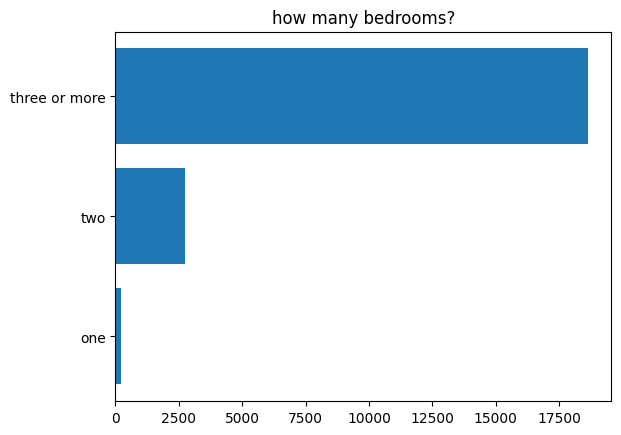

In [56]:
#Bedrooms chart
z = df1['bedrooms']

onebrm = []
twobdrms = []
thrrmr = []

for i in z:
    if (i == 1):
        onebrm.append(i)
    elif (i == 2):
        twobdrms.append(1)
    elif (i >= 3):
        thrrmr.append(1)

print(len(onebrm))
print(len(twobdrms))
print(len(thrrmr))

#TODO please use algo results to the outputs
quantityb = [199, 2760, 18641]
bedrooms = ['one', 'two', 'three or more']

plt.barh(bedrooms, quantityb)

plt.title('how many bedrooms?')

plt.show()

10680
1910
9023


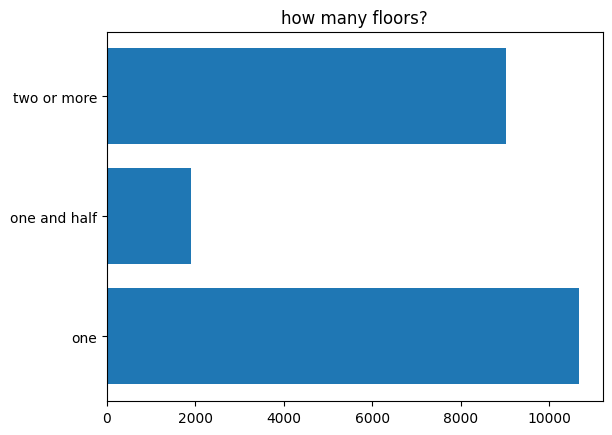

In [57]:
#Floors chart
f = df1['floors']

oneflr, onenhfflr, twrmr = []
#TODO please wrap current logic to the function 'def'
for i in f:
    if (i == 1):
        oneflr.append(i)
    elif (i > 1) and (i < 2):
        onenhfflr.append(1)
    elif (i >= 2):
        twrmr.append(1)

print(len(oneflr))
print(len(onenhfflr))
print(len(twrmr))
#TODO please use algo results to the outputs
quantityf = [10680, 1910, 9023]
floors = ['one', 'one and half', 'two or more']

plt.barh(floors, quantityf)
plt.title('how many floors?')
plt.show()